In [45]:
import matplotlib.pyplot as plt
from pylab import *
import numpy as np
import pandas as pd

%matplotlib inline
#%matplotlib notebook
#%matplotlib widgetMo

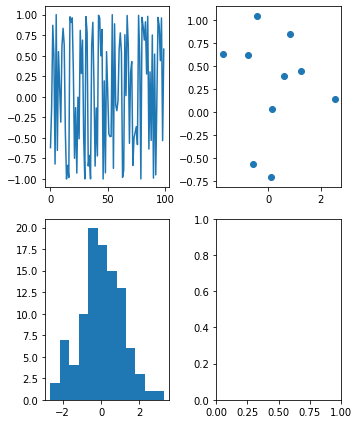

In [20]:
#1
#fig, ax = plt.subplots(1,2)
#2
#ax11 = plt.subplot(2,2,1)
#ax12 = plt.subplot(2,2,2)
#ax21 = plt.subplot(2,2,3)
#ax22 = plt.subplot(2,2,4)
#3
fig, ax = plt.subplots(2,2,figsize = (5,6))
ax11, ax12, ax21, ax22 = ax.ravel()
ax[0,0].plot(np.sin(np.random.randn(100)))
ax[0,1].scatter(np.random.randn(10), np.random.randn(10))
ax[1,0].hist(np.random.randn(100), bins="auto")
# make stuff fit
plt.tight_layout()

<bound method _AxesBase.set_yticks of <matplotlib.axes._subplots.AxesSubplot object at 0x000002B736814B70>>

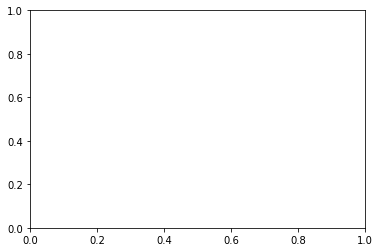

In [14]:
# get current axes
ax = plt.gca()
# get current figures
fig = plt.gcf()
# others
ax.set_title
ax.set_xlim
ax.set_ylim
ax.set_xlabel
ax.set_ylabel
ax.set_xticks
ax.set_yticks

In [23]:
np.linspace(1,10,10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

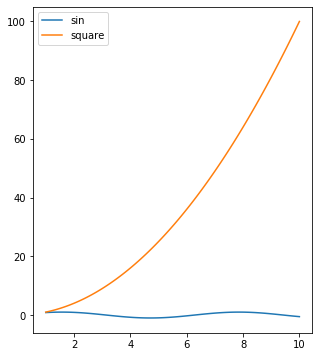

In [34]:
x = np.linspace(1,10,100)
y = np.sin(x)
z = x**2
#multiplots with same y axis
fig, ax = plt.subplots(1,1,figsize = (5,6))
ax.plot(x,y,label="sin")
ax.plot(x,z,label="square")
ax.legend()

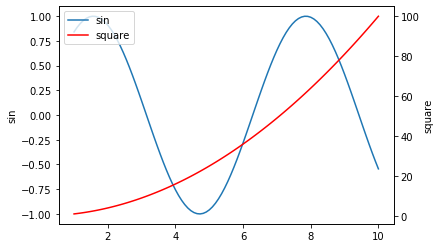

In [41]:
#multiplots with different y axis
fig, ax1 = plt.subplots(1,1)
line1, = ax1.plot(x,y)
ax2 = ax1.twinx()
line2, = ax2.plot(x,z,c="r")
ax1.set_ylabel("sin")
ax2.set_ylabel("square")
ax2.legend((line1,line2),("sin","square"))

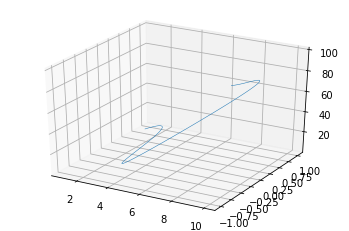

In [43]:
# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x,y,z,lw=0.5)

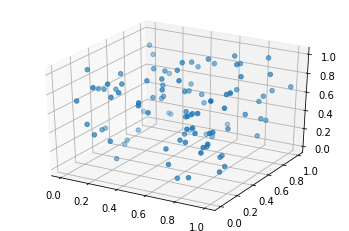

In [52]:
# 3D scatters
df = pd.DataFrame(np.random.random((100,3)))
df["z"] = ["a","b"]*50
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.scatter(df.iloc[:,0],df.iloc[:,1],df.iloc[:,2])

In [58]:
X = pd.DataFrame(np.random.randn(1000,5))
y = pd.Series([0,1]*500)

In [59]:
# grid search for cross-validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y)
neighbors = [1,2,3]
cross_val_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10)
    cross_val_scores.append(np.mean(scores))
print(f"best cross-validation score: {np.max(cross_val_scores):.3}")
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]
print(f"best n_neighbors: {best_n_neighbors}")
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print(f"test-set score: {knn.score(X_test, y_test):.3f}")

best cross-validation score: 0.52
best n_neighbors: 1
test-set score: 0.536


In [60]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
param_grid = {'n_neighbors':  np.arange(1, 30, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10,
                   return_train_score=True)
grid.fit(X_train, y_train)
print(f"best mean cross-validation score: {grid.best_score_}")
print(f"best parameters: {grid.best_params_}")
print(f"test-set score: {grid.score(X_test, y_test):.3f}")

best mean cross-validation score: 0.5226666666666666
best parameters: {'n_neighbors': 13}
test-set score: 0.508


D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
results = pd.DataFrame(grid.cv_results_)
results.columns
results.params

0      {'n_neighbors': 1}
1      {'n_neighbors': 3}
2      {'n_neighbors': 5}
3      {'n_neighbors': 7}
4      {'n_neighbors': 9}
5     {'n_neighbors': 11}
6     {'n_neighbors': 13}
7     {'n_neighbors': 15}
8     {'n_neighbors': 17}
9     {'n_neighbors': 19}
10    {'n_neighbors': 21}
11    {'n_neighbors': 23}
12    {'n_neighbors': 25}
13    {'n_neighbors': 27}
14    {'n_neighbors': 29}
Name: params, dtype: object

In [63]:
# cross validation function
from sklearn.model_selection import cross_validate
res = cross_validate(KNeighborsClassifier(), 
                     X, 
                     y, 
                     return_train_score=True,
                     scoring=["accuracy", "roc_auc"])
res_df = pd.DataFrame(res)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
# standard scaler example
from sklearn.linear_model import Ridge
# Back to King Country house prices
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

In [ ]:
# introduce new features
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=0)
from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge())
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid,
                    n_jobs=-1, return_train_score=True)
grid.fit(X_train, y_train)

In [65]:
# categorical variables
import pandas as pd
df = pd.DataFrame({
  'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
  'salary': [103, 89, 142, 54, 63, 219],
     'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df

,boro,salary,vegan
0,Manhattan,103,No
1,Queens,89,No
2,Manhattan,142,No
3,Brooklyn,54,Yes
4,Brooklyn,63,Yes
5,Bronx,219,No


In [68]:
# Ordinal encoding
df['boro_ordinal'] = df.boro.astype("category").cat.codes
df
# One-Hot Endocing
pd.get_dummies(df)
pd.get_dummies(df,columns=["boro"])

,salary,vegan,boro_ordinal,boro_Bronx,boro_Brooklyn,boro_Manhattan,boro_Queens
0,103,No,2,0,0,1,0
1,89,No,3,0,0,0,1
2,142,No,2,0,0,1,0
3,54,Yes,1,0,1,0,0
4,63,Yes,1,0,1,0,0
5,219,No,0,1,0,0,0


In [69]:
df = pd.DataFrame({
   'boro': ['Manhattan', 'Queens', 'Manhattan', 'Brooklyn', 'Brooklyn', 'Bronx'],
   'salary': [103, 89, 142, 54, 63, 219],
   'vegan': ['No', 'No','No','Yes', 'Yes', 'No']})
df['boro'] = pd.Categorical(df.boro,
                            categories=['Manhattan', 'Queens', 'Brooklyn',
                                                'Bronx', 'Staten Island'])
pd.get_dummies(df, columns=['boro'])

,salary,vegan,boro_Manhattan,boro_Queens,boro_Brooklyn,boro_Bronx,boro_Staten Island
0,103,No,1,0,0,0,0
1,89,No,0,1,0,0,0
2,142,No,1,0,0,0,0
3,54,Yes,0,0,1,0,0
4,63,Yes,0,0,1,0,0
5,219,No,0,0,0,1,0


In [ ]:
# Missing values
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_, y, stratify=y)
nan_columns = np.any(np.isnan(X_train), axis=0)
X_drop_columns = X_train[:, ~nan_columns]
scores = cross_val_score(LogisticRegressionCV(v=5), X_drop_columns, y_train, cv=10)
np.mean(scores)
# imputer with mean or median using SimpleImputer

In [ ]:
pipe = Pipeline([('preprocessing', preprocess), ('ridge', log_ridge)])
param_grid = {'ridge__regressor__alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(pipe, param_grid, cv=RepeatedKFold(10, 5),
                    return_train_score=True)
grid.fit(X_train, y_train)

In [ ]:
# grid search for Lasso
param_grid = {'alpha': np.logspace(-5, 0, 10)}
grid = GridSearchCV(Lasso(normalize=True), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

In [73]:
#Grid-searching ElasticNet
from sklearn.linear_model import ElasticNet
param_grid = {'alpha': np.logspace(-4, -1, 10),
              'l1_ratio': [0.01, .1, .5, .8, .9, .95, .98, 1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=10)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)
(grid.best_estimator_.coef_!= 0).sum()
res = pd.pivot_table(pd.DataFrame(grid.cv_results_),
    values='mean_test_score', index='param_alpha', columns='param_l1_ratio')
res

{'alpha': 0.046415888336127774, 'l1_ratio': 0.9}
-0.009873269115843963


param_l1_ratio,0.01,0.1,0.5,0.8,0.9,0.95,0.98,1.0
param_alpha,,,,,,,,
0.000100,-0.016636,-0.016628,-0.016596,-0.016572,-0.016564,-0.016560,-0.016558,-0.016556
0.000215,-0.016633,-0.016618,-0.016549,-0.016497,-0.016480,-0.016471,-0.016466,-0.016463
0.000464,-0.016628,-0.016595,-0.016447,-0.016345,-0.016311,-0.016295,-0.016284,-0.016278
0.001000,-0.016617,-0.016545,-0.016246,-0.016031,-0.015960,-0.015925,-0.015905,-0.015892
0.002154,-0.016594,-0.016440,-0.015831,-0.015438,-0.015314,-0.015251,-0.015213,-0.015188
0.004642,-0.016544,-0.016229,-0.015068,-0.014310,-0.014053,-0.013927,-0.013847,-0.013794
0.010000,-0.016438,-0.015795,-0.013547,-0.012034,-0.011620,-0.011434,-0.011342,-0.011282
0.021544,-0.016215,-0.015004,-0.011030,-0.010385,-0.010495,-0.010583,-0.010642,-0.010683
0.046416,-0.015778,-0.013510,-0.010762,-0.009896,-0.009873,-0.009873,-0.009873,-0.009873


In [74]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([0.0001    , 0.00021544, 0.00046416, 0.001     , 0.00215443,
       0.00464159, 0.01      , 0.02154435, 0.04641589, 0.1       ]),
                         'l1_ratio': [0.01, 0.1, 0.5, 0.8, 0.9, 0.95, 0.98, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
# computation consideration:
# use LinearSVC not SVC
# use Lars or LassoLars instead of LASSO
# Large sample using solver = "sag" for LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

logreg = LogisticRegression(solver="sag").fit(X,y)
linearsvm = LinearSVC().fit(X,y)

logreg.coef_

array([[-0.03108067, -0.04070247,  0.04783174, -0.04984227, -0.01982874]])

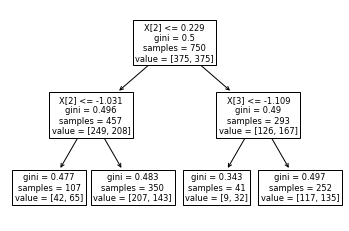

In [79]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)
from sklearn.tree import plot_tree
tree_dot = plot_tree(tree)
# feature_names=cancer.feature_names)
# Pre-pruning: Limit tree size (pick one, maybe two):
# max_depth
# max_leaf_nodes
# min_samples_split
# min_impurity_decrease

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha': np.linspace(0., 0.03, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

In [ ]:
# random forest
train_scores = []
test_scores = []
rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

# using OOB estimates
train_scores = []
test_scores = []
oob_scores = []
feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True,
                                n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)
    
# calculating variable importance
rf = RandomForestClassifier().fit(X_train, y_train)
rf.feature_importances_
plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names);

In [ ]:
# SGDClassifier, SGDRegressor and partial_fit
# Run until convergence
sgd = SGDClassifier().fit(X_train, y_train)
# Run one iteration over a batched dataset
sgd = SGDClassifier()
for X_batch, y_batch in batches:
    sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
# Run several iterations over a batched datasets
for i in range(10):
    for X_batch, y_batch in batches:
        sgd.partial_fit(X_batch, y_batch, classes=[0, 1, 2])
# SGDClassifier(), SGDRegressor() fast on very large datasets
# Tuning learning rate and schedule can be tricky.
# partial_fit allows working with out-of-memory data!

In [ ]:
# conda install -c conda-forge xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)
#supports missing values
#GPU training
#networked parallel training
#monotonicity constraints
#supports sparse data

#conda install -c conda-forge lightgbm
from lightgbm.sklearn import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)
#supports missing values
#natively supports categorical variables
#GPU training
#networked parallel training
#monotonicity constraints
#supports sparse data

#conda install -c conda-forge catboost
from catboost.sklearn import CatBoostClassifier
catb = CatBoostClassifier()
catb.fit(X_train, y_train)
catb.score(X_test, y_test)
#optimized for categorical variables
#uses one feature / threshold for all splits on a given level aka symmetric trees
#Symmetric trees are "different" but can be much faster
#supports missing value
#GPU training
#monotonicity constraints
#uses bagged and smoothed version of target encoding for categorical variables
#lots of tooling

In [ ]:
# Model Evaluation
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
data = load_breast_cancer()
lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r')

confusion_matrix(y_true, y_pred)
confusion_matrix(y_true, y_pred,
                 normalize='true')
confusion_matrix(y_true, y_pred,
                 normalize='pred')
classification_report(y_true, y_pred)

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
for y_pred in [y_pred_1, y_pred_2, y_pred_3]:
    print(accuracy_score(y_true, y_pred))

# Precision-Recall curve
svc.fit(X_train, y_train)
plot_precision_recall_curve(svc, X_test, y_test, name='SVC')

prc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
# plot pops up here
prc
vars(pr_svc)
# plot again without recomputing
prc.plot()

# ROC curve
plot_roc_curve(svc, X_test, y_test, name='SVC')

# comparing different model
pr_svc = plot_precision_recall_curve(svc, X_test, y_test, name='SVC')
# if we used computed before, we could just call pr_svc.plot()
# using ax=plt.gca() will plot into the existing axes instead of creating  
# new ones
pr_rf = plot_precision_recall_curve(rf, X_test, y_test, ax=plt.gca())


In [ ]:
# Calibration with imbalanced dataset
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV().fit(X_train, y_train)
print(lr.predict_proba(X_test)[:10])
print(y_test[:10])
from sklearn.calibration import calibration_curve
probs = lr.predict_proba(X_test)[:, 1]
prob_true, prob_pred = calibration_curve(y_test, probs, n_bins=5)
print(prob_true)
print(prob_pred)
from sklearn.calibration import CalibratedClassifierCV
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, 
                                                          y_train,
                                                          stratify=y_train, 
                                                          random_state=0)
rf = RandomForestClassifier().fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, scores, n_bins=20)

cal_rf = CalibratedClassifierCV(rf, cv="prefit", method='sigmoid')
cal_rf.fit(X_val, y_val)
scores_sigm = cal_rf.predict_proba(X_test)[:, 1]
cal_rf_iso = CalibratedClassifierCV(rf, cv="prefit", method='isotonic')
cal_rf_iso.fit(X_val, y_val)
scores_iso = cal_rf_iso.predict_proba(X_test)[:, 1]

cal_rf_iso_cv = CalibratedClassifierCV(rf, method='isotonic')
cal_rf_iso_cv.fit(X_train, y_train)
scores_iso_cv = cal_rf_iso_cv.predict_proba(X_test)[:, 1]

# http://imbalanced-learn.org
# pip install -U imbalanced-learn
# Extends sklearn API
# random undersampling and random oversampling
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(replacement=False)
X_train_subsample, y_train_subsample = rus.fit_sample(
    X_train, y_train)
print(X_train.shape)
print(X_train_subsample.shape)
print(np.bincount(y_train_subsample))
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_train_oversample, y_train_oversample = ros.fit_sample(
    X_train, y_train)
print(X_train.shape)
print(X_train_oversample.shape)
print(np.bincount(y_train_oversample))

# Class-weights 
# instead of repeating the samples, reweight the loss function
scores = cross_validate(LogisticRegression(class_weight='balanced'),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()
scores = cross_validate(RandomForestClassifier(n_estimators=100,
                                               class_weight='balanced'),
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()

from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedBaggingClassifier
# from imblearn.ensemble import BalancedRandomForestClassifier
# resampled_rf = BalancedRandomForestClassifier()
tree = DecisionTreeClassifier(max_features='auto')
resampled_rf = BalancedBaggingClassifier(base_estimator=tree,
                                         random_state=0)
scores = cross_validate(resampled_rf,
                        X_train, y_train, cv=10,
                        scoring=('roc_auc', 'average_precision'))
scores['test_roc_auc'].mean(), scores['test_average_precision'].mean()


Interpretable ML

Explain model globally

How does the output depend on the input?
Often: some form of marginals

Explain model locally

Why did it classify this point this way?

Explanation could look like a "global" one but be different for each point.

"What is the minimum change to classify it differently?"

Explaning the model ≠ explaining the data

model inspection only tells you about the model

the model might not accurately reflect the data

"Features important to the model"?

coef_ for linear models (abs value or norm for multi-class)
feature_importances_ for tree-based models
Use with care!

Linear Model coefficients

Relative importance only meaningful after scaling

Correlation among features might make coefficients completely uninterpretable

L1 regularization will pick one at random from a correlated group

Any penalty will invalidate usual interpretation of linear coefficients

In [82]:
# Drop Feature Importance
def drop_feature_importance(est, X, y):
    base_score = np.mean(cross_val_score(est, X, y))
    scores = []
    for feature in range(X.shape[1]):
        mask = np.ones(X.shape[1], 'bool')
        mask[feature] = False
        X_new = X[:, mask]
        this_score = np.mean(cross_val_score(est, X_new, y))
        scores.append(base_score - this_score)
    return np.array(scores)
# Doesn't really explain model (refits for each feature)
# Can't deal with correlated features well
# Very slow
# Can be used for feature selection

In [ ]:
# Permutation importance
def permutation_importance(est, X, y, n_repeat=100):
    baseline_score = estimator.score(X, y)
    for f_idx in range(X.shape[1]):
        for repeat in range(n_repeat):
            X_new = X.copy()
            X_new[:, f_idx] = np.random.shuffle(X[:, f_idx])
            feature_score = estimator.score(X_new, y)
            scores[f_idx, repeat] = baseline_score - feature_score

Lime
- Build sparse linear local model around each data point.
- Explain prediction for each point locally.
- Paper: "Why Should I Trust You?" Explaining the Predictions of Any Classifier
- Implementation: ELI5, https://github.com/marcotcr/lime

SHAP
- Build around idea of Shaply values
- very roughly: does drop-out importance for every subset of features
- intractable, sampling approximations exists
- fast variants for linear and tree-based models
- awesome vis and tools: https://github.com/slundberg/shap
- allows local / per sample explanations

In [ ]:
# Partial Dependence
from sklearn.inspection import plot_partial_dependence
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,random_state=0)
gbrt = GradientBoostingRegressor().fit(X_train, y_train)
fig, axs = plot_partial_dependence(gbrt, X_train, np.argsort(gbrt.feature_importances_)[-6:], feature_names=boston.feature_names)

plot_partial_dependence(
    gbrt, X_train, [np.argsort(gbrt.feature_importances_)[-2:]],
    feature_names=boston.feature_names, n_jobs=3, grid_resolution=50)

# pdp for classification
from sklearn.inspection import plot_partial_dependence
for i in range(3):
    fig, axs = plot_partial_dependence(gbrt, X_train, range(4), n_cols=4,
                                       feature_names=iris.feature_names, grid_resolution=50, label=i)

In [ ]:
X_train = np.random.randn(1000,5)
y_train = np.random.randn(1000)
lasso = LassoCV().fit(X_train, y_train)
lasso.score(X_test, y_test)

ridge = RidgeCV().fit(X_train, y_train)
ridge.score(X_test, y_test)

lr = LinearRegression().fit(X_train, y_train)
lr.score(X_test, y_test)

param_grid = {'max_leaf_nodes': range(5, 40, 5)}
grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10, n_jobs=3)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

rf = RandomForestRegressor(min_samples_leaf=5).fit(X_train, y_train)
rf.score(X_test, y_test)

Feature Selection

Reason:
- Avoid overfitting
- Faster prediction and training
- Less storage for model and dataset
- More interpretable model

Methods:
- Unsupervised vs Supervised
- Univariate vs Multivariate
- Model based or not

Unsupervised Feature Selection:
- May discard important information
- Variance-based: 0 variance or mostly constant
- Covariance-based: remove correlated features
- PCA: remove linear subspaces

Model-Based Feature Selection
- Get best fit for a particular model
- Ideally: exhaustive search over all possible combinations
- Exhaustive is infeasible (and has multiple testing issues)
- Use heuristics in practice.

In [ ]:
# Covariance
from sklearn.preprocessing import scale
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = scale(X_train)
cov = np.cov(X_train_scaled, rowvar=False)
from scipy.cluster import hierarchy
order = np.array(hierarchy.dendrogram(
    hierarchy.ward(cov),no_plot=True)['ivl'], dtype="int")

In [ ]:
# Univariate Statistics
# Pick statistic, check p-values
f_regression, f_classsif, chi2 in scikit-learn
from sklearn.feature_selection import f_regression
f_values, p_values = f_regression(X, y)

from sklearn.feature_selection import SelectKBest, SelectPercentile,\
SelectFpr
from sklearn.linear_model import RidgeCV
select = SelectKBest(k=2, score_func=f_regression)
select.fit(X_train, y_train)
print(X_train.shape)
print(select.transform(X_train).shape)

all_features = make_pipeline(StandardScaler(), RidgeCV())
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

select_2 = make_pipeline(StandardScaler(),
                         SelectKBest(k=2, score_func=f_regression), RidgeCV())
np.mean(cross_val_score(select_2, X_train, y_train, cv=10))

In [ ]:
# mutual information
from sklearn.feature_selection import mutual_info_regression
scores = mutual_info_regression(X_train, y_train,
                                discrete_features=[3])

In [ ]:
# Model based (single fit)
# Build a model, select "features important to model"
# Lasso, other linear models, tree-based Models
# Multivariate - linear models assume linear relation
from sklearn.linear_model import LassoCV
X_train_scaled = scale(X_train)
lasso = LassoCV().fit(X_train_scaled, y_train)
print(lasso.coef_)
# Changing Lasso alpha
from sklearn.linear_model import Lasso
X_train_scaled = scale(X_train)
lasso = Lasso().fit(X_train_scaled, y_train)
print(lasso.coef_)

from sklearn.feature_selection import SelectFromModel
select_lassocv = SelectFromModel(LassoCV(), threshold=1e-5)
select_lassocv.fit(X_train, y_train)
print(select_lassocv.transform(X_train).shape)

pipe_lassocv = make_pipeline(StandardScaler(), select_lassocv, RidgeCV())
np.mean(cross_val_score(pipe_lassocv, X_train, y_train, cv=10))
np.mean(cross_val_score(all_features, X_train, y_train, cv=10))

# could grid-search alpha in lasso
select_lasso = SelectFromModel(Lasso())
pipe_lasso = make_pipeline(StandardScaler(), select_lasso, RidgeCV())
np.mean(cross_val_score(pipe_lasso, X_train, y_train, cv=10))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
# create ranking among all features by selecting only one
rfe = RFE(LinearRegression(), n_features_to_select=1)
rfe.fit(X_train_scaled, y_train)
rfe.ranking_

In [ ]:
# search for hyper parameters
# specify parameters and distributions to sample from
from scipy.stats import randint
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
random_search = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=200)

http://rasbt.github.io/mlxtend/